In [6]:
# Jupyter Notebook for Creating a Deep Learning Model to Predict Stocks
# Albert You

# Data taken from https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/


In [7]:
# import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

df = pd.read_csv('data.csv')

df.head() # prints the head. Note that df.head gives a nonformatted output. df.head() is nice and pretty

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


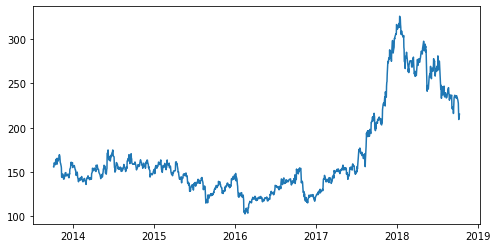

In [8]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

plt.figure(figsize=(8,4))
plt.plot(df.Close, label='Close price history')

C:\Users\youal\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\youal\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


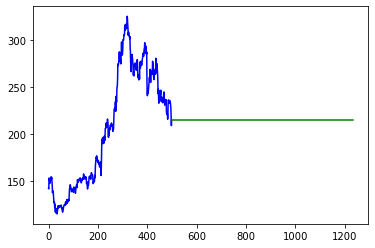

In [9]:
# ARIMA Model

import pmdarima as pm
from pmdarima.model_selection import train_test_split

# split the data
train, test = train_test_split(df.Close, train_size=500)

# train the model
model = pm.auto_arima(np.flip(train), seasonal = True, m= 1)

# make forecasts
forecasts = model.predict(test.shape[0])


# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(df.Close.shape[0])
plt.plot(x[:500], np.flip(train), c='blue')
plt.plot(x[500:], forecasts, c='green')
plt.show()


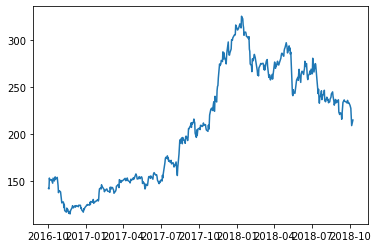

In [10]:
plt.plot(np.flip(train))